In [1]:
#KÜTÜPHANELERİ İMPORT ETME#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_curve, roc_auc_score


In [2]:
# Veri setini bir CSV dosyasından okuyoruz ve bir DataFrame oluşturuyoruz.
data = pd.read_csv("credit_risk.csv")    # "credit_risk.csv" dosyasını pandas ile okuma işlemi
df = pd.DataFrame(data)  # Okunan verileri bir DataFrame formatına çeviriyoruz

# Veri setindeki eksik değerlerin sayısını sütun bazında kontrol ediyoruz.
# Her bir sütunda kaç eksik değer olduğunu topluyoruz ve ekrana yazdırıyoruz.
print(df.isnull().sum())  


Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64


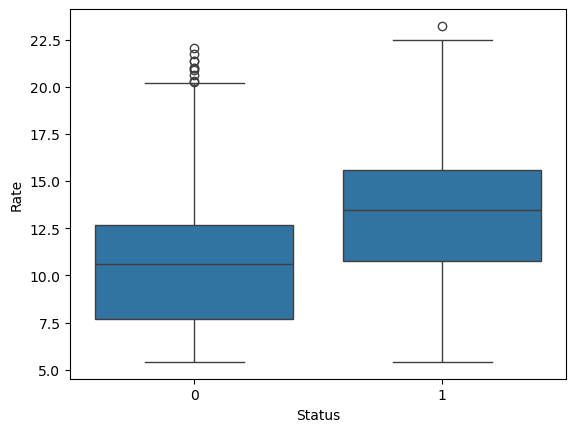

In [3]:
# Rate sütunundaki aykırı (uç) değerleri tespit etmek için bir boxplot (kutu grafiği) oluşturuyoruz.
# X ekseninde 'Status' değişkenini, Y ekseninde ise 'Rate' değişkenini kullanıyoruz.
# Status: 0 (Kredi reddedildi) ve 1 (Kredi onaylandı) durumlarını temsil ediyor.
sns.boxplot(x="Status", y="Rate", data=df)  # seaborn kütüphanesi ile kutu grafiği çizimi

# Grafiklerin ekranda gösterilmesini sağlıyoruz.
plt.show()  # Matplotlib ile grafiği görselleştiriyoruz.


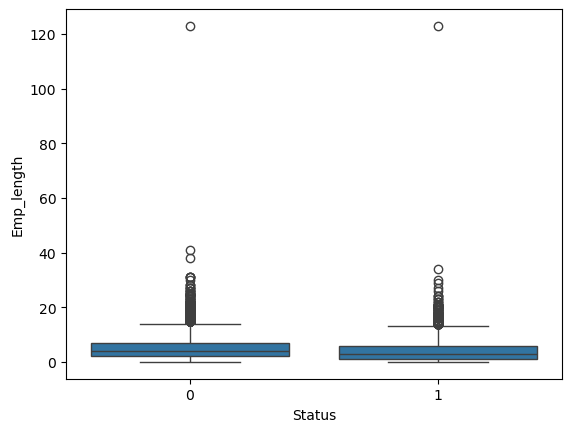

In [4]:
# Emp_length (çalışma süresi) sütunundaki değerlerin boxplot (kutu grafiği) ile görselleştirilmesi.
# X ekseninde 'Status' (kredi durumu: 0 = reddedildi, 1 = onaylandı), 
# Y ekseninde ise 'Emp_length' (çalışma süresi, yıl cinsinden) değişkenini kullandık.
# Aykırı değerlerin 25 yıldan sonra başladığı gözlemlenebilir.
sns.boxplot(x="Status", y="Emp_length", data=df)  # Boxplot oluşturulması

# Grafiği ekrana yazdırıyoruz.
plt.show()  # Matplotlib ile kutu grafiğini görselleştiriyoruz.


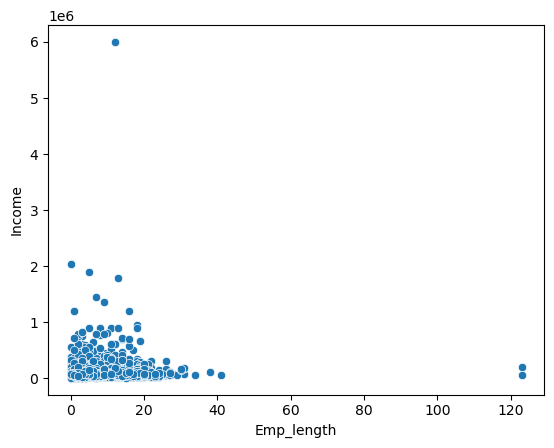

Id                   0
Age                  0
Income               0
Home                 0
Emp_length         895
Intent               0
Amount               0
Rate              3116
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64


In [5]:
# Normalizasyon uygulanmamış ve aykırı değerler içeren 'Emp_length' sütununun,
# 'Income'(Gelir) sütununa göre dağılımını scatterplot (dağılım grafiği) ile inceliyoruz.
# Amaç: Çalışma süresi (Emp_length) ile gelir (Income) arasında bir ilişki olup olmadığını anlamak.
# Not: 'Emp_length' tarafında 120+ yıl iş tecrübesi gözüküyor, bu gerçekçi olmayan bir değerdir ve aykırı bir durumdur.
sns.scatterplot(x="Emp_length", y="Income", data=df)  # Scatterplot oluşturulması

# Grafiği ekrana yazdırıyoruz.
plt.show()  # Matplotlib ile görselleştirme.

# Veri setindeki eksik değerleri tekrar kontrol etmek için sütun bazında eksik değer toplamlarını yazdırıyoruz.
print(df.isnull().sum())  # NaN değerlerin sütun bazında toplamı.


In [6]:
# Burada 'Emp_length' sütunu için IQR yöntemi uygulanarak alt limit ve üst limit belirlenmiştir.
# IQR yöntemi: Çeyrekler arası aralık kullanılarak veri setindeki aykırı değerleri tespit etme yöntemidir.
# Standart IQR formülü 1.5*IQR değeri ile sınırları belirlerken, bu kodda deneme-yanılma yöntemi ile parametreler ayarlanmıştır.
# 'Emp_length' sütununun boxplot grafiğindeki gözlemler dikkate alınmıştır.

# IQR hesaplama (Standart Q1 ve Q3 çeyrek değerleri kullanılarak)
Q1 = df["Emp_length"].quantile(0.25)  # 1. çeyrek (25. yüzdelik dilim)
Q3 = df["Emp_length"].quantile(0.75)  # 3. çeyrek (75. yüzdelik dilim)
IQR_emp_length = Q3 - Q1  # Çeyrekler arası aralık (IQR)

# Alt ve üst sınırların belirlenmesi (deneme yanılma ile farklı katsayılar kullanılmış)
alt_limit_EmpLength = Q1 - (0.4 * IQR_emp_length)  # Alt sınır
ust_limit_EmpLength = Q3 + (2.8 * IQR_emp_length)  # Üst sınır

# Alt ve üst sınırların yazdırılması
print(f"Alt Limit: {alt_limit_EmpLength}")
print(f"Üst Limit: {ust_limit_EmpLength}")


Alt Limit: 0.0
Üst Limit: 21.0


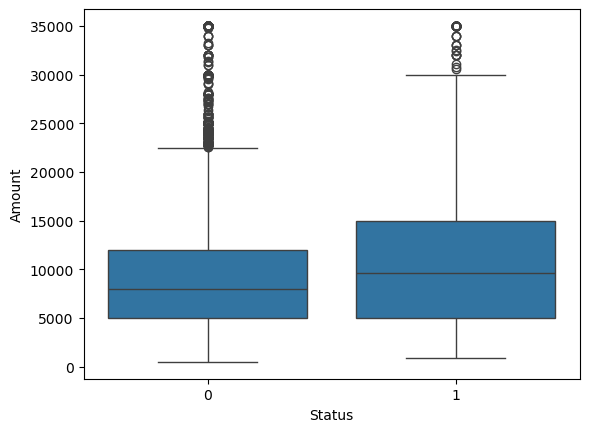

In [7]:
# 'Amount' sütunundaki değerlerin boxplot (kutu grafiği) ile görselleştirilmesi.
# Amaç: 'Amount' (kredi miktarı) değişkeninin 'Status' (kredi durumu: 0 = reddedildi, 1 = onaylandı) sınıflarına göre dağılımını incelemek.
sns.boxplot(x="Status", y="Amount", data=df)  # 'Status' ve 'Amount' sütunları için kutu grafiği oluşturma

# Grafiği ekrana yazdırıyoruz.
plt.show()  # Matplotlib kullanarak görselleştirme.


In [8]:
# IQR yönteminin 'Amount' sütununa uygulanması.
# Veri setine uygun limitlerin tespiti için deneme-yanılma yöntemiyle Q2 ve Q4 (örnek yüzdelik) değerleri kullanılmıştır.

# 'Amount' sütunu için yüzde 31 (0.31) ve yüzde 69 (0.69) değerleri hesaplanıyor.
Q2 = df["Amount"].quantile(0.31)  # Alt çeyrek (yüzdelik dilim).
Q4 = df["Amount"].quantile(0.69)  # Üst çeyrek (yüzdelik dilim).

# Çeyrekler arası aralık (IQR) hesaplanıyor.
IQR_Amount = Q4 - Q2  # Çeyrekler arası fark (IQR).

# Alt ve üst limitlerin hesaplanması
# Alt limit: Q2'den 0.1 katı IQR çıkarılmıştır.
alt_limit_Amount = Q2 - (0.1 * IQR_Amount)
print(f"Alt Limit: {alt_limit_Amount}")

# Üst limit: Q4'e 2.4 katı IQR eklenmiştir.
ust_limit_Amount = Q4 + (2.4 * IQR_Amount)
print(f"Üst Limit: {ust_limit_Amount}")

# 'Amount' ve 'Emp_length' için belirlenen limitlere göre veri seti filtreleniyor.
# Aykırı değerleri temizlemek için alt ve üst sınırlar dahilinde yeni bir DataFrame oluşturuluyor.
df_new = df[
    ((df["Amount"] >= alt_limit_Amount) & (df["Amount"] <= ust_limit_Amount)) &  # 'Amount' sütunu için filtreleme
    ((df["Emp_length"] >= alt_limit_EmpLength) & (df["Emp_length"] <= ust_limit_EmpLength))  # 'Emp_length' sütunu için filtreleme
]

# Filtrelenmiş veri setinin gösterilmesi.
print(df_new)


Alt Limit: 5010.0
Üst Limit: 25660.0
          Id  Age  Income      Home  Emp_length             Intent  Amount  \
2          2   25    9600  MORTGAGE         1.0            MEDICAL    5500   
33        33   25  306000      RENT         2.0  DEBTCONSOLIDATION   24250   
34        34   26  300000  MORTGAGE        10.0            MEDICAL    7800   
42        42   26  300000  MORTGAGE        10.0            VENTURE   20000   
43        43   23  300000       OWN         1.0          EDUCATION   24250   
...      ...  ...     ...       ...         ...                ...     ...   
32574  32574   52   65004      RENT         4.0           PERSONAL   20000   
32576  32576   57   53000  MORTGAGE         1.0           PERSONAL    5800   
32577  32577   54  120000  MORTGAGE         4.0           PERSONAL   17625   
32579  32579   56  150000  MORTGAGE         5.0           PERSONAL   15000   
32580  32780   66   42000      RENT         2.0            MEDICAL    6475   

        Rate  Status  Perc

In [9]:
#Amaç: Filtreleme işleminden sonra hala mevcut olabilecek aykırı değerleri belirlemek.
# Filtrelenmiş veri setinde (`df_new`) alt ve üst limitlerin dışında kalan değerler aykırı olarak belirleniyor.

remaining_outliers = df_new[
    (df_new["Amount"] < alt_limit_Amount) |  # 'Amount' alt limitin altında olan değerler
    (df_new["Amount"] > ust_limit_Amount) |  # 'Amount' üst limitin üstünde olan değerler
    (df_new["Emp_length"] < alt_limit_EmpLength) |  # 'Emp_length' alt limitin altında olan değerler
    (df_new["Emp_length"] > ust_limit_EmpLength)  # 'Emp_length' üst limitin üstünde olan değerler
]

# Kalan aykırı değerlerin gösterimi
print("Kalan aykırı değerler:")
print(remaining_outliers)


Kalan aykırı değerler:
Empty DataFrame
Columns: [Id, Age, Income, Home, Emp_length, Intent, Amount, Rate, Status, Percent_income, Default, Cred_length]
Index: []


In [10]:
# Aykırı değerlerin filtrelenmesi sonrasında bozulmuş olan indekslerin yeniden düzenlenmesi.
# DataFrame'in indeksleri 0, 1, 2, ... şeklinde sıfırdan başlayarak yeniden numaralandırılıyor.
df_new.reset_index(drop=True, inplace=True)

# Düzenlenmiş DataFrame'in gösterimi.
print(df_new)


          Id  Age  Income      Home  Emp_length             Intent  Amount  \
0          2   25    9600  MORTGAGE         1.0            MEDICAL    5500   
1         33   25  306000      RENT         2.0  DEBTCONSOLIDATION   24250   
2         34   26  300000  MORTGAGE        10.0            MEDICAL    7800   
3         42   26  300000  MORTGAGE        10.0            VENTURE   20000   
4         43   23  300000       OWN         1.0          EDUCATION   24250   
...      ...  ...     ...       ...         ...                ...     ...   
22108  32574   52   65004      RENT         4.0           PERSONAL   20000   
22109  32576   57   53000  MORTGAGE         1.0           PERSONAL    5800   
22110  32577   54  120000  MORTGAGE         4.0           PERSONAL   17625   
22111  32579   56  150000  MORTGAGE         5.0           PERSONAL   15000   
22112  32780   66   42000      RENT         2.0            MEDICAL    6475   

        Rate  Status  Percent_income Default  Cred_length  
0  

In [11]:
# Yeni oluşturulan DataFrame'de (df_new) eksik değerlerin kontrolü.
# Tüm sütunlardaki eksik (NaN) değerlerin sayısı hesaplanıyor.
print(df_new.isnull().sum())


Id                   0
Age                  0
Income               0
Home                 0
Emp_length           0
Intent               0
Amount               0
Rate              2094
Status               0
Percent_income       0
Default              0
Cred_length          0
dtype: int64


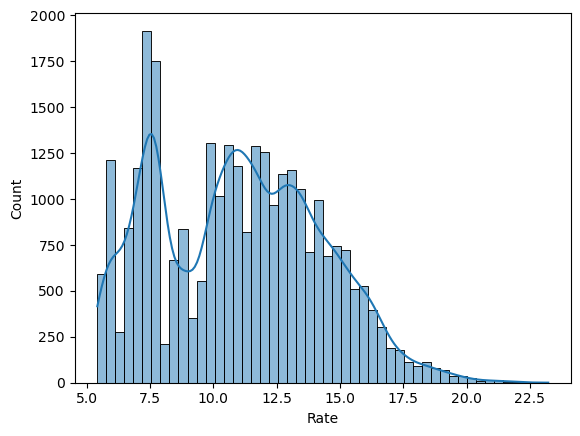

In [12]:
# Veri setindeki 'Rate' sütununda eksik değerlerin doldurulması için analiz.
# Eksik değerleri ortalama (mean) veya moda (mode) göre doldurmayı seçmek için sütunun dağılımını inceliyoruz.

# 'Rate' sütununu histogram olarak görselleştiriyoruz.
# Ayrıca KDE (Kernel Density Estimation) eğrisi eklenerek verilerin yoğunluk dağılımı gösteriliyor.
sns.histplot(df["Rate"], kde=True)  # Histogram ve yoğunluk eğrisi
plt.show()  # Görselleştirmeyi ekrana yazdır

# Bu grafikten çıkarım:
# Veriler sürekli (kontinü) bir dağılıma sahip ve çan eğrisi şeklinde görünüyor.
# Bu nedenle eksik değerleri 'ortalama' ile doldurmak uygun bir seçenek olacaktır.


In [13]:
# "Rate" sütunundaki eksik değerleri sütunun ortalamasıyla doldurma işlemi
df_new["Rate"] = df_new["Rate"].fillna(df_new["Rate"].mean())  

# Veri setindeki eksik değerlerin tekrar kontrolü
print(df_new.isnull().sum())


Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


C:\Users\Tuncer\AppData\Local\Temp\ipykernel_28212\2506661795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Rate"] = df_new["Rate"].fillna(df_new["Rate"].mean())


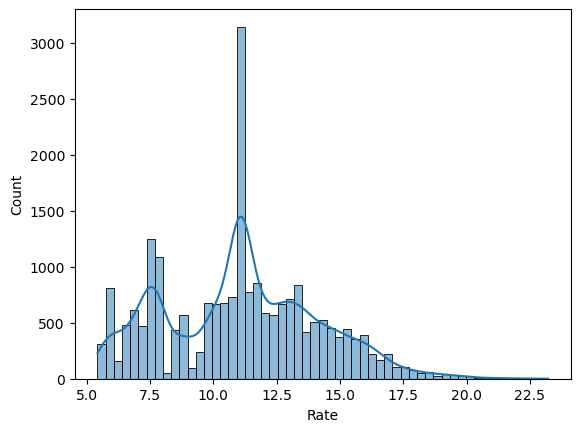

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


In [14]:
# Ortalama ile doldurulmuş "Rate" sütununun dağılımını göstermek için histogram grafiği çizimi.
sns.histplot(df_new["Rate"], kde=True)  # Histogram grafiği ve KDE (yoğunluk eğrisi) eklenir.
plt.show()  # Grafiği ekrana yazdırır.

# Eksik değerlerin tekrar kontrol edilmesi.
print(df_new.isnull().sum())  # Tüm sütunlardaki eksik değer sayısını hesaplar ve yazdırır.


In [15]:
# Veri setindeki tüm sütunlarda eksik (NaN) değerlerin kontrolü
print(df_new.isnull().sum())

#Bu doğrulama işlemi, verilerimizin temiz ve eksiksiz olduğunu kanıtlamıştır.


Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


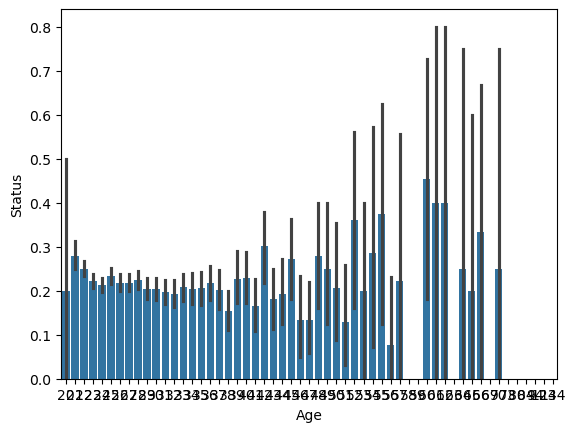

In [16]:
# Bu bölümde 'Age' özelliğinin hedef değişken olan 'Status' ile ilişkisi görselleştirilmiştir.
sns.barplot(x="Age", y="Status", data=df_new)  # X ekseninde 'Age', Y ekseninde 'Status' ile bir çubuk grafiği oluşturuluyor.
plt.show()  # Grafiği ekrana yazdır.


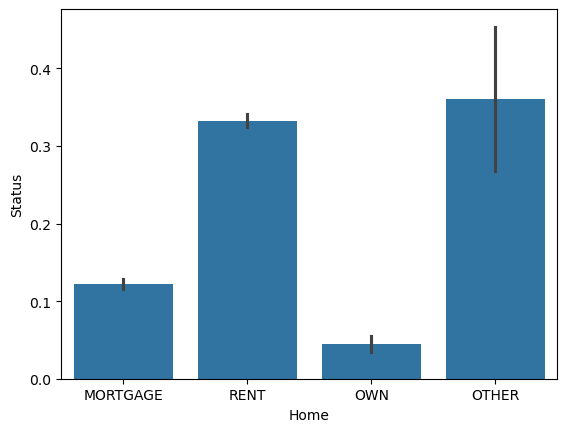

In [17]:
# 'Home' özelliğinin içindeki sınıfların 'Status' (hedef değişken) ile ilişkisini analiz ediyoruz.
sns.barplot(x="Home", y="Status", data=df_new)  # X ekseninde 'Home' sınıfları, Y ekseninde 'Status' ortalamaları
plt.show()  # Grafiği ekrana yazdır

# MORTGAGE (İpotek):

#     Kredi onay oranı düşük görünüyor (yaklaşık 0.1).
#     Bu, ipotek sahibi olan bireylerin kredi onaylanma oranının daha düşük olduğunu gösterebilir.

# RENT (Kiralık):

#     En yüksek kredi onay oranına sahip kategori (~0.35).
#     Kiracıların kredi onaylanma ihtimalinin diğer gruplara kıyasla daha yüksek olduğu gözlemlenebilir.

# OWN (Ev Sahibi):

#     Kredi onay oranı oldukça düşük (~0.05).
#     Bu, ev sahiplerinin kredi alırken diğer gruplara göre daha az onay aldığını gösterebilir.

# OTHER (Diğer):

#     Diğer kategorisi için kredi onay oranı yaklaşık olarak RENT kategorisine yakındır (~0.3).
#     Ancak bu kategorideki standart hata çizgisi daha geniş, yani varyasyon oldukça fazladır (daha az veri veya tutarsız dağılım olabilir).


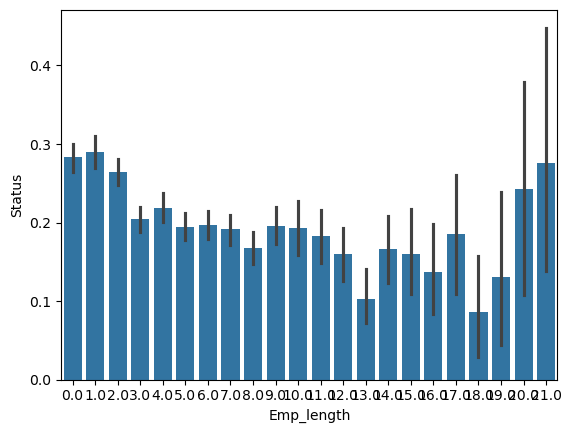

In [18]:
# Düzenlenmiş 'Emp_length' (çalışma süresi) sütununun hedef değişken 'Status' ile ilişkisini görselleştiriyoruz.
sns.barplot(x="Emp_length", y="Status", data=df_new)  # X ekseninde 'Emp_length', Y ekseninde 'Status' ortalamaları
plt.show()  # Grafiği ekrana yazdır

# 0-1 Yıllık Çalışma Süresi:

#     Kredi onay oranı nispeten yüksek (~0.3-0.35).
#     Çalışma süresi 0-1 yıl olan bireylerin kredi alma olasılığının diğer bazı gruplara göre daha yüksek olduğu görülüyor.

# 2-5 Yıllık Çalışma Süresi:

#     Çalışma süresi arttıkça kredi onay oranında azalma gözlemleniyor (~0.2-0.25).
#     Bu durum, belirli bir aralıkta çalışma süresinin kredi onayına olumsuz etkisi olabileceğini gösterebilir.

# 6-10 Yıllık Çalışma Süresi:

#     Oranlar düşmeye devam ediyor (~0.1-0.15).
#     Bu, uzun süreli çalışan bireylerin kredi alma oranlarının daha düşük olduğunu gösterebilir.

# 11+ Yıllık Çalışma Süresi:

#     Çalışma süresi 11 yıl ve üzerinde olan bireylerde kredi onay oranları tekrar yükselmektedir (~0.4 civarı).


In [19]:
# Normalizasyon işlemleri: Burada Min-Max Normalizasyon yöntemi kullanılmıştır.
# Verileri normalize etmemizin amacı, farklı özelliklerin ölçeklerini aynı düzeye getirmektir.
Normalizasyon_Columns = ["Age", "Income", "Amount", "Rate", "Emp_length", "Cred_length"]  # Normalize edilecek sütunlar
scaler = MinMaxScaler()  # Min-Max ölçekleme objesi

# Seçilen sütunları Min-Max scaler ile normalize etme
df_new[Normalizasyon_Columns] = scaler.fit_transform(df_new[Normalizasyon_Columns])

# Eksik değer kontrolü
print(df_new.isnull().sum())


Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


C:\Users\Tuncer\AppData\Local\Temp\ipykernel_28212\296714246.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[Normalizasyon_Columns] = scaler.fit_transform(df_new[Normalizasyon_Columns])


In [20]:
# Yeni normalize edilmiş veri setini yazdırıyoruz.
print(df_new)

# Veri Yapısı: Veri setimde toplam 22,113 satır ve 12 sütun var. Sayısal sütunlar Min-Max Scaler ile normalize edildi ve tüm değerler 0-1 arasında ölçeklendi.

# Kategorik Sütunlar: Home, Intent, Default gibi kategorik sütunlar üzerinde henüz bir işlem yapılmadı.

# Hedef Değişken (Status): Status sütunu (0 ve 1 değerleri) modelleme için hazır durumda.

# Normalizasyon Sonrası: Normalize edilen sütunların ölçekleri doğru görünüyor.


          Id       Age    Income      Home  Emp_length             Intent  \
0          2  0.040323  0.000787  MORTGAGE    0.047619            MEDICAL   
1         33  0.040323  0.146669      RENT    0.095238  DEBTCONSOLIDATION   
2         34  0.048387  0.143716  MORTGAGE    0.476190            MEDICAL   
3         42  0.048387  0.143716  MORTGAGE    0.476190            VENTURE   
4         43  0.024194  0.143716       OWN    0.047619          EDUCATION   
...      ...       ...       ...       ...         ...                ...   
22108  32574  0.258065  0.028056      RENT    0.190476           PERSONAL   
22109  32576  0.298387  0.022148  MORTGAGE    0.047619           PERSONAL   
22110  32577  0.274194  0.055124  MORTGAGE    0.190476           PERSONAL   
22111  32579  0.290323  0.069889  MORTGAGE    0.238095           PERSONAL   
22112  32780  0.370968  0.016734      RENT    0.095238            MEDICAL   

         Amount      Rate  Status  Percent_income Default  Cred_length  
0 

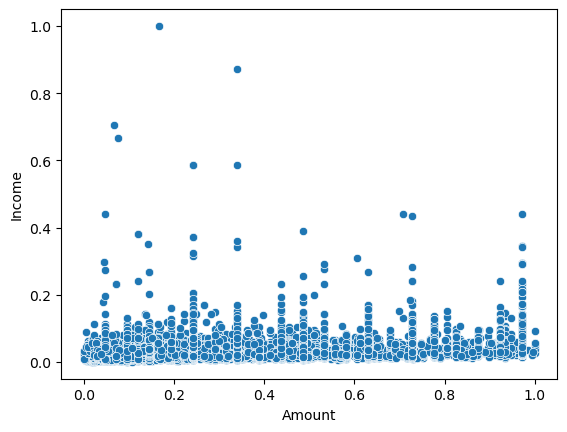

In [21]:
# Normalize edilmiş 'Amount' ve 'Income' sütunlarının scatterplot grafiği ile ilişkisi
sns.scatterplot(x="Amount", y="Income", data=df_new)  # X ekseninde 'Amount', Y ekseninde 'Income'
plt.show()  # Grafiği ekrana yazdır

#Grafik Yorumlama:
# Dağılım:
    # Verilerin büyük bir kısmı düşük Income (gelir) ve düşük Amount (kredi miktarı) değerleri arasında yoğunlaşmış.
    # Bu durum, düşük gelir seviyesindeki bireylerin daha küçük miktarlarda kredi başvurusu yaptığını gösterebilir.
# Yüksek Gelir - Düşük Kredi:
    # Bazı yüksek gelirli bireyler (Y ekseninde üst değerler) düşük kredi miktarları (X ekseninde sol değerler) için başvuru yapmış.
# Yüksek Kredi - Yüksek Gelir:
    # Grafik, yüksek gelirli bireylerin yüksek kredi miktarları için başvurduğunu da gösteriyor. Ancak bu bireyler, veri setindeki genel dağılıma göre daha az sayıda.
# Genel İlişki:
    # Verilerin net bir doğrusal ilişki göstermediği gözlemleniyor. Bu da, Income ve Amount arasındaki ilişkinin sınırlı olabileceğini veya başka faktörlerin de etkili olduğunu işaret edebilir.


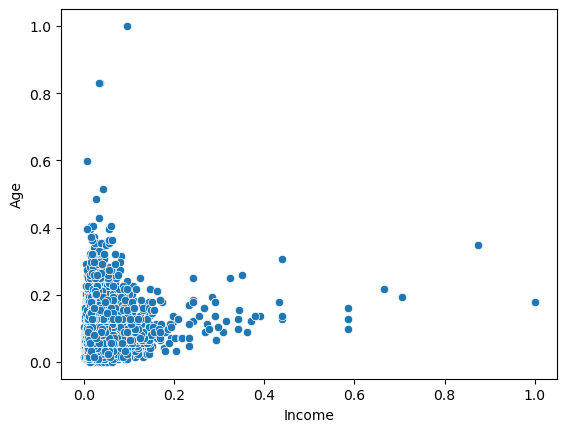

In [22]:
# Normalize edilmiş 'Income' ve 'Age' değişkenlerinin scatterplot grafiği ile görselleştirilmesi
sns.scatterplot(x="Income", y="Age", data=df_new)  # X ekseninde 'Income', Y ekseninde 'Age'
plt.show()  # Grafiği ekrana yazdır

# Grafik Yorumlama:

#    Düşük Gelir - Genç Yaş:
#    Geliri düşük olan bireylerin büyük bir çoğunluğu genç yaş grubunda yoğunlaşmış görünüyor (X ekseni düşük, Y ekseni düşük).

#     Yüksek Gelir - Daha İleri Yaş:
#     Daha ileri yaş gruplarında (Y ekseni yüksek), yüksek gelire sahip bireyler sınırlı sayıdadır.
#     Ancak bu bireyler grafikte açıkça görülmekte, bu da yaşın gelir üzerindeki etkisini gösterebilir.

#     Genel Dağılım:
#     Verilerin büyük kısmı düşük gelir (X ekseni) ve genç yaş (Y ekseni) grubunda yoğunlaşmıştır.
#     Income ve Age arasında belirgin bir doğrusal ilişki gözlemlenmemiştir.

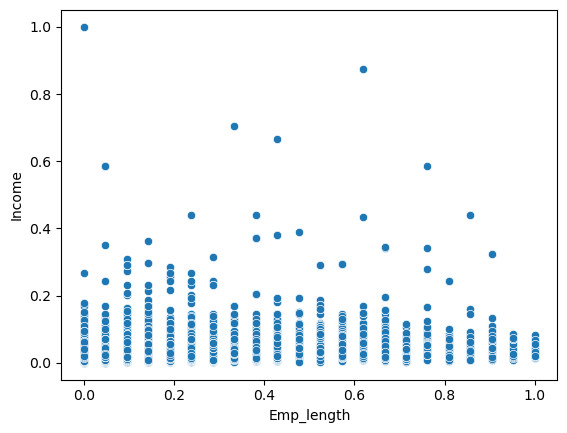

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64


In [23]:
# Normalize edilmiş 'Emp_length' (çalışma süresi) ile 'Income' (gelir) değişkenlerinin scatterplot grafiği
sns.scatterplot(x="Emp_length", y="Income", data=df_new)  # X ekseninde 'Emp_length', Y ekseninde 'Income'
plt.show()  # Grafiği ekrana yazdır
print(df_new.isnull().sum())  # Eksik değerlerin kontrolü


# Grafik Yorumlama:

#     Düşük Çalışma Süresi - Düşük Gelir:
#         Çalışma süresi düşük olan bireylerin genellikle düşük gelir seviyelerinde yoğunlaştığı gözlemleniyor (X ekseni düşük, Y ekseni düşük).

#     Uzun Çalışma Süresi - Orta Gelir:
#         Çalışma süresi arttıkça gelir düzeyinin biraz daha arttığı, ancak hala düşük ile orta seviye arasında yoğunlaştığı görülüyor.
#         Yüksek gelirli bireylerin uzun çalışma sürelerinde daha az olduğu gözlemleniyor.

#     Genel İlişki:
#         Dağılımda çok belirgin bir doğrusal ilişki görülmüyor. Gelir düzeyini etkileyen başka değişkenlerin de etkili olduğu düşünülebilir.

In [24]:
# 'Home' sütunundaki benzersiz sınıfları görüntüleme
print(df['Home'].unique())


['RENT' 'OWN' 'MORTGAGE' 'OTHER']


In [25]:
# 'Home' sütunundaki sınıfların kaç adet olduğunu görmek için
print(df_new["Home"].value_counts())


Home
RENT        10789
MORTGAGE     9661
OWN          1577
OTHER          86
Name: count, dtype: int64


In [26]:
# Home sütununda 'OTHER' kategorisini 'OWN' kategorisiyle birleştirme
df_new['Home'] = df_new['Home'].replace('OTHER', 'OWN')


C:\Users\Tuncer\AppData\Local\Temp\ipykernel_28212\428384894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Home'] = df_new['Home'].replace('OTHER', 'OWN')


In [27]:
#Home sutunu sınıf sayılarını yazdırma
print(df_new['Home'].value_counts())

Home
RENT        10789
MORTGAGE     9661
OWN          1663
Name: count, dtype: int64


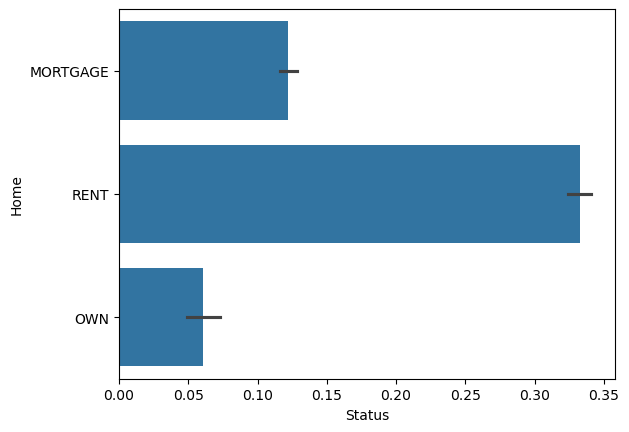

In [28]:
sns.barplot(x="Status", y="Home", data=df_new)  # Status'e göre Home kategorilerinin ortalamalarını gösteren barplot
plt.show()


In [29]:
# Kategorik değişkenleri belirleme
categorical_columns = df_new.select_dtypes(include=['object', 'category']).columns.tolist()
print("Kategorik Değişkenler:", categorical_columns)


Kategorik Değişkenler: ['Home', 'Intent', 'Default']


In [30]:
# Orijinal sütunları yedekle
df_new['Home_original'] = df_new['Home']
df_new['Intent_original'] = df_new['Intent']
df_new['Default_original'] = df_new['Default']


C:\Users\Tuncer\AppData\Local\Temp\ipykernel_28212\668743600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Home_original'] = df_new['Home']
C:\Users\Tuncer\AppData\Local\Temp\ipykernel_28212\668743600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Intent_original'] = df_new['Intent']
C:\Users\Tuncer\AppData\Local\Temp\ipykernel_28212\668743600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

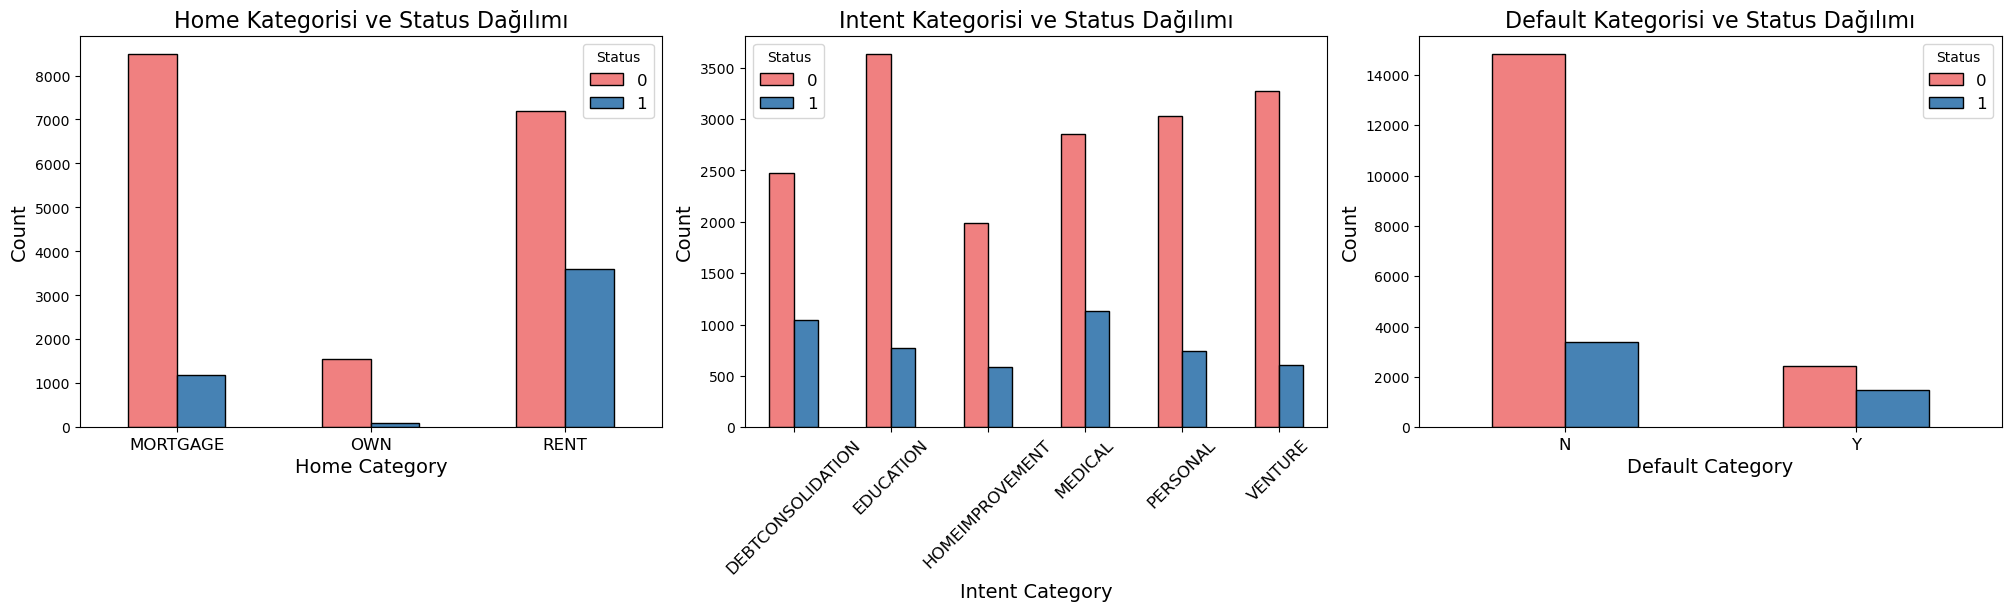

In [31]:
# Home kategorisi için Status'e göre dağılım
home_status_counts = df_new.groupby(['Home_original', 'Status']).size().reset_index(name='Count')
pivot_home_status = home_status_counts.pivot(index='Home_original', columns='Status', values='Count').fillna(0)

# Intent kategorisi için Status'e göre dağılım
intent_status_counts = df_new.groupby(['Intent_original', 'Status']).size().reset_index(name='Count')
pivot_intent_status = intent_status_counts.pivot(index='Intent_original', columns='Status', values='Count').fillna(0)

# Default kategorisi için Status'e göre dağılım
default_status_counts = df_new.groupby(['Default_original', 'Status']).size().reset_index(name='Count')
pivot_default_status = default_status_counts.pivot(index='Default_original', columns='Status', values='Count').fillna(0)

# Hepsini yan yana çiz
fig, axes = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)

# Home kategorisi grafiği
pivot_home_status.plot(kind='bar', ax=axes[0], color=['lightcoral', 'steelblue'], edgecolor='black')
axes[0].set_title("Home Kategorisi ve Status Dağılımı", fontsize=16)
axes[0].set_xlabel("Home Category", fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)
axes[0].tick_params(axis='x', rotation=0, labelsize=12)
axes[0].legend(title="Status", fontsize=12)

# Intent kategorisi grafiği
pivot_intent_status.plot(kind='bar', ax=axes[1], color=['lightcoral', 'steelblue'], edgecolor='black')
axes[1].set_title("Intent Kategorisi ve Status Dağılımı", fontsize=16)
axes[1].set_xlabel("Intent Category", fontsize=14)
axes[1].set_ylabel("Count", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].legend(title="Status", fontsize=12)

# Default kategorisi grafiği
pivot_default_status.plot(kind='bar', ax=axes[2], color=['lightcoral', 'steelblue'], edgecolor='black')
axes[2].set_title("Default Kategorisi ve Status Dağılımı", fontsize=16)
axes[2].set_xlabel("Default Category", fontsize=14)
axes[2].set_ylabel("Count", fontsize=14)
axes[2].tick_params(axis='x', rotation=0, labelsize=12)
axes[2].legend(title="Status", fontsize=12)

# Grafikleri göster
plt.show()



In [32]:
#burada Home sutununa one-hot encoder uygulanmıstır ve kategorik olan veriler sayısal verilere donusturulmustur.
#one-hot encoder uygulanmasının sebebi ise burada own,rent ve mortgage sınıflarınınn arasında mantıksal bir sıralama bulunmamasıdır.
#ome-hot encoder içine dummy tuzagından kaçmak için drop='first' parametre olarak verilmiştir
encoder=OneHotEncoder(sparse_output=False,drop='first')
encoded=encoder.fit_transform(df_new[["Home"]])

encoded_df_new=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(['Home']))
df_new=pd.concat([df_new,encoded_df_new],axis=1)


In [33]:
#one-hot encoding own,rent ve mortgage için ayrı ayrı 3 sutun olusturur ancak bu bir hataya sebep olabilir olusturulacak 3 sutunda
#1 ve 0 gibi degerler ile tespit edilecektir ve biz buradan aslında bir matris olusturabiliriz
# örneğin 1,0,0 ise own 0,1,0 ise rent veyya 0,0,1 ise mortgage oalcaktır ve böyle bu durumda bu matrisleri
# matematiksel olarak gösterebliriz ve 3 sutun arasında bir baglantı kurmus oluruz ve bu modelin olumsuz yonde etkilenmesine yol açar
# bu sebeple paramtre olarak drop='first' uygularız ve olusacak bir sutunu yok ederiz 
# burada drop edilen sutun manuel olarak olusturulur. 
df_new['Home_MORTGAGE'] = ((df_new['Home_OWN'] == 0.0) & (df_new['Home_RENT'] == 0.0)).astype(int)

# Sonuçları İnceleme
print("Home_OWN, Home_RENT ve Home_MORTGAGE Değerleri:")
print(df_new[['Home_OWN', 'Home_RENT', 'Home_MORTGAGE']])
print(df_new)


Home_OWN, Home_RENT ve Home_MORTGAGE Değerleri:
       Home_OWN  Home_RENT  Home_MORTGAGE
0           0.0        0.0              1
1           0.0        1.0              0
2           0.0        0.0              1
3           0.0        0.0              1
4           1.0        0.0              0
...         ...        ...            ...
22108       0.0        1.0              0
22109       0.0        0.0              1
22110       0.0        0.0              1
22111       0.0        0.0              1
22112       0.0        1.0              0

[22113 rows x 3 columns]
          Id       Age    Income      Home  Emp_length             Intent  \
0          2  0.040323  0.000787  MORTGAGE    0.047619            MEDICAL   
1         33  0.040323  0.146669      RENT    0.095238  DEBTCONSOLIDATION   
2         34  0.048387  0.143716  MORTGAGE    0.476190            MEDICAL   
3         42  0.048387  0.143716  MORTGAGE    0.476190            VENTURE   
4         43  0.024194  0.143716     

In [34]:
# One-Hot Encoder ile Intent sütununun kodlanması
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Sparse matris yerine dense bir matris döndür ve ilk kategori düşsün
encoded = encoder.fit_transform(df_new[["Intent"]])  # Intent sütununu One-Hot Encoding ile kodla

# Kodlanan verileri DataFrame olarak oluştur ve yeni sütun isimlerini belirle
encoded_df_new = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Intent"]))

# Yeni sütunları orijinal DataFrame'e ekle
df_new = pd.concat([df_new, encoded_df_new], axis=1)  # Kodlanmış verileri DataFrame'e ekle


In [35]:
# Yeni bir sütun oluştur ve belirli koşullara göre değer ata
df_new['Intent_DEBTCONSOLIDATION'] = (
    (df_new["Intent_EDUCATION"] == 0.0) & 
    (df_new["Intent_HOMEIMPROVEMENT"] == 0.0) &
    (df_new["Intent_MEDICAL"] == 0.0) & 
    (df_new["Intent_VENTURE"] == 0.0) &
    (df_new["Intent_PERSONAL"] == 0.0)
).astype(int)

# Veri çerçevesindeki eksik değerlerin toplamını yazdır
print(df_new.isnull().sum())


Id                          0
Age                         0
Income                      0
Home                        0
Emp_length                  0
Intent                      0
Amount                      0
Rate                        0
Status                      0
Percent_income              0
Default                     0
Cred_length                 0
Home_original               0
Intent_original             0
Default_original            0
Home_OWN                    0
Home_RENT                   0
Home_MORTGAGE               0
Intent_EDUCATION            0
Intent_HOMEIMPROVEMENT      0
Intent_MEDICAL              0
Intent_PERSONAL             0
Intent_VENTURE              0
Intent_DEBTCONSOLIDATION    0
dtype: int64


In [36]:
#default sutunu içerisinde sadece yes ve no sınıfları bulundugundan ve bunlar arasında bir oncelik sıralamsı oldugundan dolayı label encoding yapılabilir.
Label_encoder=LabelEncoder()
df_new["Default"]=Label_encoder.fit_transform(df_new["Default"])
print(df_new["Default"].head)

<bound method NDFrame.head of 0        0
1        0
2        0
3        0
4        1
        ..
22108    1
22109    0
22110    0
22111    0
22112    0
Name: Default, Length: 22113, dtype: int32>


In [37]:
print(df_new.isnull().sum())

Id                          0
Age                         0
Income                      0
Home                        0
Emp_length                  0
Intent                      0
Amount                      0
Rate                        0
Status                      0
Percent_income              0
Default                     0
Cred_length                 0
Home_original               0
Intent_original             0
Default_original            0
Home_OWN                    0
Home_RENT                   0
Home_MORTGAGE               0
Intent_EDUCATION            0
Intent_HOMEIMPROVEMENT      0
Intent_MEDICAL              0
Intent_PERSONAL             0
Intent_VENTURE              0
Intent_DEBTCONSOLIDATION    0
dtype: int64


In [38]:
# Kategorik verileri yazdırma
categorical_columns = df_new.select_dtypes(include=['object', 'category']).columns.tolist()
print("Kategorik Değişkenler:", categorical_columns)


Kategorik Değişkenler: ['Home', 'Intent', 'Home_original', 'Intent_original', 'Default_original']


In [39]:
#one hot encoding yapılmadan önce yedeklenen sutunları dataframe'den kaldırma
df_new.drop(columns=["Home_original","Intent_original","Default_original"],inplace=True)

In [40]:
print(df_new.isnull().sum())

Id                          0
Age                         0
Income                      0
Home                        0
Emp_length                  0
Intent                      0
Amount                      0
Rate                        0
Status                      0
Percent_income              0
Default                     0
Cred_length                 0
Home_OWN                    0
Home_RENT                   0
Home_MORTGAGE               0
Intent_EDUCATION            0
Intent_HOMEIMPROVEMENT      0
Intent_MEDICAL              0
Intent_PERSONAL             0
Intent_VENTURE              0
Intent_DEBTCONSOLIDATION    0
dtype: int64


In [41]:
#artık home ve Intent sutunlarını sayısal olarak ifade ettiğimizden dolayı drop edebiliriz
df_new.drop(columns=["Home","Intent"],inplace=True)

In [42]:
#gereksiz sutunları kaldırma
print(df_new.isnull().sum())
df_new.drop(columns=["Id"],inplace=True)


Id                          0
Age                         0
Income                      0
Emp_length                  0
Amount                      0
Rate                        0
Status                      0
Percent_income              0
Default                     0
Cred_length                 0
Home_OWN                    0
Home_RENT                   0
Home_MORTGAGE               0
Intent_EDUCATION            0
Intent_HOMEIMPROVEMENT      0
Intent_MEDICAL              0
Intent_PERSONAL             0
Intent_VENTURE              0
Intent_DEBTCONSOLIDATION    0
dtype: int64


In [43]:
#kategorik veri kontrolu
categorical_columns = df_new.select_dtypes(include=['object', 'category']).columns.tolist()
print("Kategorik Değişkenler:", categorical_columns)


Kategorik Değişkenler: []


In [44]:
#yukarıda own sınıfının veri sayısının diğer sınıflardan az oldugunu ve bir dengesizlik arattıgını belirtmistik burada o dengesizliği gidermek için işlemler yapılmıstır
# OWN sınıfındaki verileri seçme
own_data = df_new[df_new['Home_OWN'] == 1]

# OWN sınıfını çoğaltarak veri setine ekleme
needed_samples = len(df_new[df_new['Home_RENT'] == 1]) - len(own_data)
own_data_duplicated = own_data.sample(n=needed_samples, replace=True, random_state=42)

# Yeni veri setini birleştirme
df_new = pd.concat([df_new, own_data_duplicated], axis=0).reset_index(drop=True)

# Sonuçları kontrol etme
print("Yeni veri setindeki sınıf dağılımı:")
print(df_new['Home_OWN'].value_counts())


Yeni veri setindeki sınıf dağılımı:
Home_OWN
0.0    20450
1.0    10789
Name: count, dtype: int64


In [45]:
#sınıf sayısı kontrolu
print(df_new["Home_OWN"].value_counts())
print(df_new["Home_RENT"].value_counts())
print(df_new["Home_MORTGAGE"].value_counts())

Home_OWN
0.0    20450
1.0    10789
Name: count, dtype: int64
Home_RENT
0.0    20450
1.0    10789
Name: count, dtype: int64
Home_MORTGAGE
0    21578
1     9661
Name: count, dtype: int64


In [46]:
#aynı seklde bir dengesiz durum daha default sutununda bulunmaktadırr bu yuzden bu sutuna da aynı işlemler sutun ozelinde yapılmıstır
#OWN sınıfındaki verileri seçme
own_data = df_new[df_new['Default'] == 1]

# OWN sınıfını çoğaltarak veri setine ekleme
needed_samples = len(df_new[df_new['Default'] == 0]) - len(own_data)
own_data_duplicated = own_data.sample(n=needed_samples, replace=True, random_state=42)

# Yeni veri setini birleştirme
df_new = pd.concat([df_new, own_data_duplicated], axis=0).reset_index(drop=True)

# Sonuçları kontrol etme
print("Yeni veri setindeki sınıf dağılımı:")
print(df_new['Default'].value_counts())

Yeni veri setindeki sınıf dağılımı:
Default
0    25563
1    25563
Name: count, dtype: int64


In [47]:
#sınıf sayısı kontrolu
print(df_new["Home_OWN"].value_counts())
print(df_new["Home_RENT"].value_counts())
print(df_new["Home_MORTGAGE"].value_counts())

Home_OWN
0.0    33061
1.0    18065
Name: count, dtype: int64
Home_RENT
0.0    32977
1.0    18149
Name: count, dtype: int64
Home_MORTGAGE
0    36214
1    14912
Name: count, dtype: int64


In [48]:
print(df_new["Default"].value_counts())

Default
0    25563
1    25563
Name: count, dtype: int64


In [49]:
#hedef degişkeninin verilerinde de bir dengesizlik söz konusudur bu dengesizlik overfitting ya da underfitting olusturabilir bu yuzden 
#bu sutuna da manurl arttırma işlemi uygulanmıstır.
# OWN sınıfındaki verileri seçme
own_data = df_new[df_new['Status'] == 1]

# OWN sınıfını çoğaltarak veri setine ekleme
needed_samples = len(df_new[df_new['Status'] == 0]) - len(own_data)
own_data_duplicated = own_data.sample(n=needed_samples, replace=True, random_state=42)

# Yeni veri setini birleştirme
df_new = pd.concat([df_new, own_data_duplicated], axis=0).reset_index(drop=True)

# Sonuçları kontrol etme
print("Yeni veri setindeki sınıf dağılımı:")
print(df_new['Status'].value_counts())

Yeni veri setindeki sınıf dağılımı:
Status
1    39750
0    39750
Name: count, dtype: int64


In [50]:
#olusturulan son df_new yeni.csv dosyasına donusturulmustur
df_new.to_csv("yeni.csv")

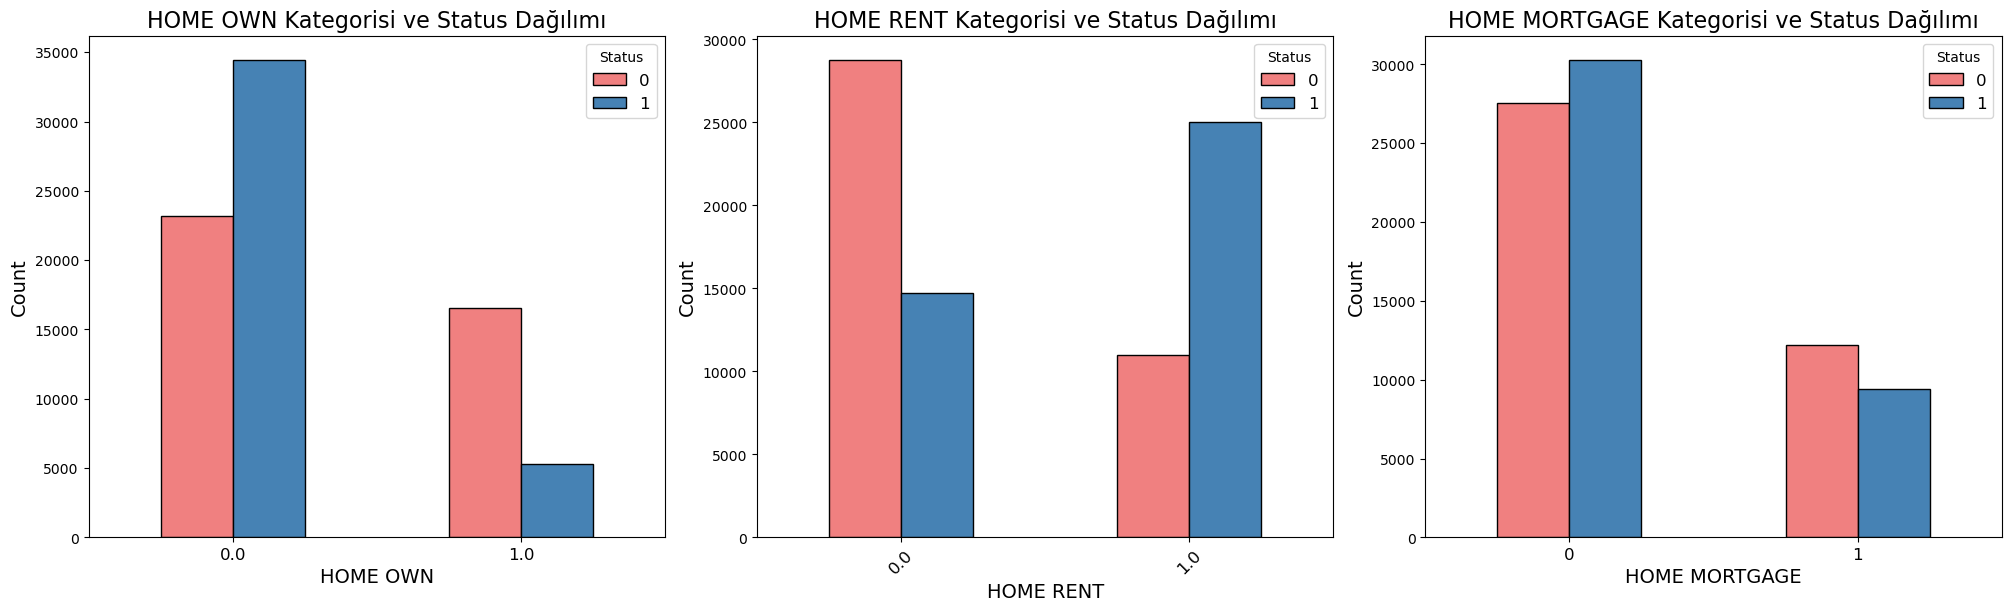

In [51]:
# Home kategorisi için Status'e göre dağılım
home_status_counts = df_new.groupby(['Home_OWN', 'Status']).size().reset_index(name='Count')
pivot_home_status = home_status_counts.pivot(index='Home_OWN', columns='Status', values='Count').fillna(0)

# Intent kategorisi için Status'e göre dağılım
intent_status_counts = df_new.groupby(['Home_RENT', 'Status']).size().reset_index(name='Count')
pivot_intent_status = intent_status_counts.pivot(index='Home_RENT', columns='Status', values='Count').fillna(0)

# Default kategorisi için Status'e göre dağılım
default_status_counts = df_new.groupby(['Home_MORTGAGE', 'Status']).size().reset_index(name='Count')
pivot_default_status = default_status_counts.pivot(index='Home_MORTGAGE', columns='Status', values='Count').fillna(0)

# Hepsini yan yana çiz
fig, axes = plt.subplots(1, 3, figsize=(20, 6), constrained_layout=True)

# Home kategorisi grafiği
pivot_home_status.plot(kind='bar', ax=axes[0], color=['lightcoral', 'steelblue'], edgecolor='black')
axes[0].set_title("HOME OWN Kategorisi ve Status Dağılımı", fontsize=16)
axes[0].set_xlabel("HOME OWN", fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)
axes[0].tick_params(axis='x', rotation=0, labelsize=12)
axes[0].legend(title="Status", fontsize=12)

# Intent kategorisi grafiği
pivot_intent_status.plot(kind='bar', ax=axes[1], color=['lightcoral', 'steelblue'], edgecolor='black')
axes[1].set_title("HOME RENT Kategorisi ve Status Dağılımı", fontsize=16)
axes[1].set_xlabel("HOME RENT", fontsize=14)
axes[1].set_ylabel("Count", fontsize=14)
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].legend(title="Status", fontsize=12)

# Default kategorisi grafiği
pivot_default_status.plot(kind='bar', ax=axes[2], color=['lightcoral', 'steelblue'], edgecolor='black')
axes[2].set_title("HOME MORTGAGE Kategorisi ve Status Dağılımı", fontsize=16)
axes[2].set_xlabel("HOME MORTGAGE", fontsize=14)
axes[2].set_ylabel("Count", fontsize=14)
axes[2].tick_params(axis='x', rotation=0, labelsize=12)
axes[2].legend(title="Status", fontsize=12)

# Grafikleri göster
plt.show()

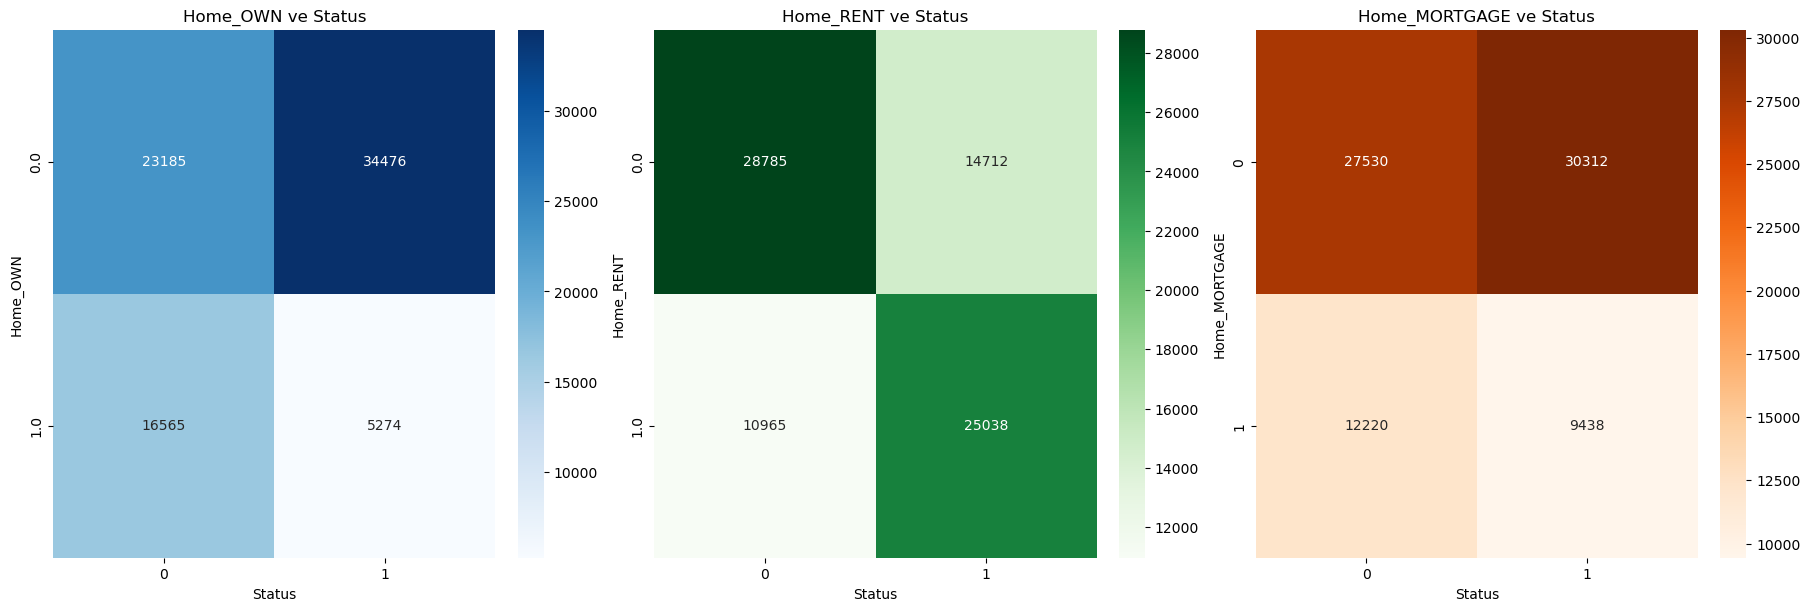

In [52]:
# Home_OWN için pivot tablo
pivot_own = df_new.pivot_table(index='Home_OWN', columns='Status', aggfunc='size', fill_value=0)

# Home_RENT için pivot tablo
pivot_rent = df_new.pivot_table(index='Home_RENT', columns='Status', aggfunc='size', fill_value=0)

# Home_MORTGAGE için pivot tablo
pivot_mortgage = df_new.pivot_table(index='Home_MORTGAGE', columns='Status', aggfunc='size', fill_value=0)


# Yan yana 3 grafik için bir figür oluşturun
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Heatmap 1: Home_OWN
sns.heatmap(pivot_own, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Home_OWN ve Status')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Home_OWN')

# Heatmap 2: Home_RENT
sns.heatmap(pivot_rent, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Home_RENT ve Status')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Home_RENT')

# Heatmap 3: Home_MORTGAGE
sns.heatmap(pivot_mortgage, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('Home_MORTGAGE ve Status')
axes[2].set_xlabel('Status')
axes[2].set_ylabel('Home_MORTGAGE')

# Grafikleri göster
plt.show()


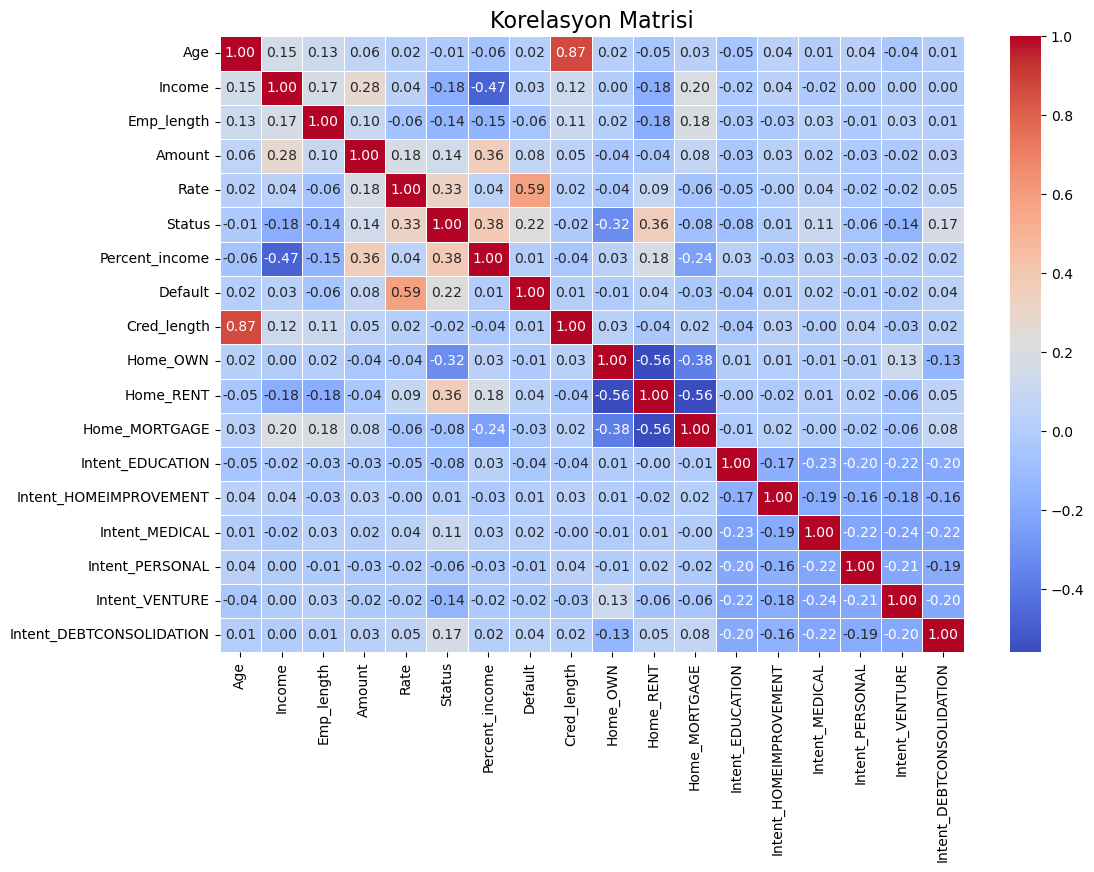

In [53]:
# Korelasyon matrisi hesaplama
correlation_matrix = df_new.corr()
plt.figure(figsize=(12, 8))  # Grafiğin boyutunu ayarla
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Grafik başlığı ve etiketler
plt.title('Korelasyon Matrisi', fontsize=16)
plt.show()


Status
0    25473
1     7108
Name: count, dtype: int64


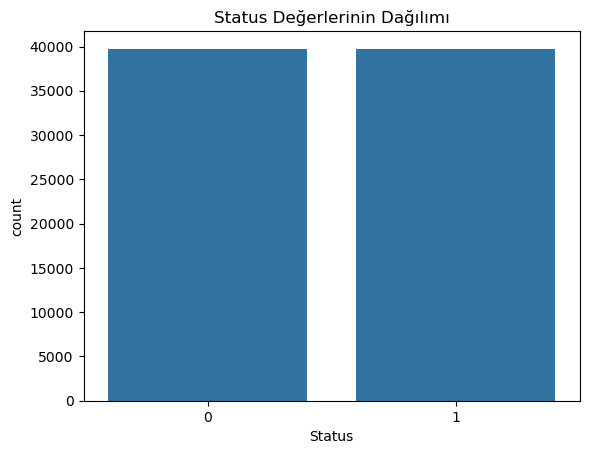

In [54]:
# Status sütununun sınıf dağılımını yazdır
print(df['Status'].value_counts())

# Status sütununun dağılımını görselleştir
sns.countplot(x='Status', data=df_new)
plt.title('Status Değerlerinin Dağılımı')
plt.show()


In [55]:
# Veri çerçevesinden gereksiz sütunların kaldırılması
# "Intent_DEBTCONSOLIDATION", "Intent_MEDICAL", "Intent_VENTURE", 
# "Intent_EDUCATION", "Intent_HOMEIMPROVEMENT" ve "Intent_PERSONAL" sütunları
# One-Hot Encoding sonucu oluşturulmuştu. Artık bu sütunlara gerek kalmadığı için kaldırıyoruz.

df_new.drop(
    columns=[
        "Intent_DEBTCONSOLIDATION", 
        "Intent_MEDICAL", 
        "Intent_VENTURE", 
        "Intent_EDUCATION", 
        "Intent_HOMEIMPROVEMENT", 
        "Intent_PERSONAL"
    ], 
    inplace=True
)


In [69]:
# 'Status' sütununu hedef değişken (b) olarak ayırıyoruz
# Geriye kalan tüm sütunlar bağımsız değişkenler (a) olarak alınır
a = df_new.drop("Status", axis=1)  # Hedef değişken hariç tüm veriler
b = df_new["Status"]  # Hedef değişken (Status)

# Veri setini eğitim ve test seti olarak ayırıyoruz
# Test veri seti %30, eğitim veri seti %70 olacak şekilde bölünüyor
a_egitim, a_Test, b_egitim, b_Test = train_test_split(a, b, test_size=0.3, random_state=42)

# Random Forest sınıflandırıcıyı tanımlıyoruz
# - n_estimators: 100 karar ağacı kullanıyoruz
# - max_depth: Her bir karar ağacı için maksimum derinlik 10 olarak belirlenmiş
# - min_samples_split: Bir dalın ikiye bölünebilmesi için gereken minimum örnek sayısı 10
# - random_state: Sonuçların tekrarlanabilir olması için sabit bir rastgelelik
randomforest = RandomForestClassifier(
    n_estimators=100,  # 100 karar ağacı
    max_depth=10,      # Maksimum derinlik
    min_samples_split=10,  # Minimum örnek sayısı
    random_state=42    # Sabit rastgelelik
)

# Modeli eğitim verileri üzerinde eğitiyoruz
randomforest.fit(a_egitim, b_egitim)

# Modelin test veri seti üzerindeki tahminlerini alıyoruz
b_pred_test = randomforest.predict(a_Test)

# Modelin eğitim veri seti üzerindeki tahminlerini alıyoruz
b_pred_train = randomforest.predict(a_egitim)


In [70]:
# Eğitim seti performans metriklerini hesaplıyoruz ve ekrana yazdırıyoruz
print("Eğitim Seti Performansı:")
print(f"Accuracy: {accuracy_score(b_egitim, b_pred_train):.2f}")  # Doğruluk oranı
print(f"Precision: {precision_score(b_egitim, b_pred_train):.2f}")  # Kesinlik (Precision)
print(f"Recall: {recall_score(b_egitim, b_pred_train):.2f}")  # Duyarlılık (Recall)
print(f"F1 Score: {f1_score(b_egitim, b_pred_train):.2f}")  # F1 Skoru (Harmonik Ortalama)

# Test seti performans metriklerini hesaplıyoruz ve ekrana yazdırıyoruz
print("\nTest Seti Performansı:")
print(f"Accuracy: {accuracy_score(b_Test, b_pred_test):.2f}")  # Doğruluk oranı
print(f"Precision: {precision_score(b_Test, b_pred_test):.2f}")  # Kesinlik (Precision)
print(f"Recall: {recall_score(b_Test, b_pred_test):.2f}")  # Duyarlılık (Recall)
print(f"F1 Score: {f1_score(b_Test, b_pred_test):.2f}")  # F1 Skoru (Harmonik Ortalama)

# Test seti için karışıklık matrisini hesaplıyoruz ve ekrana yazdırıyoruz
print("\nConfusion Matrix (Test Seti):")
print(confusion_matrix(b_Test, b_pred_test))  # Test seti için gerçek ve tahmin değerleri arasındaki matrisi göster


Eğitim Seti Performansı:
Accuracy: 0.91
Precision: 0.92
Recall: 0.90
F1 Score: 0.91

Test Seti Performansı:
Accuracy: 0.90
Precision: 0.91
Recall: 0.89
F1 Score: 0.90

Confusion Matrix (Test Seti):
[[10842  1105]
 [ 1289 10614]]


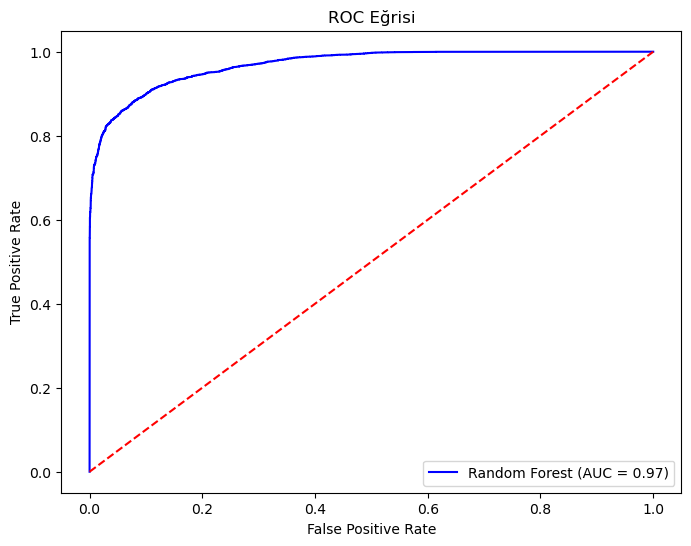

In [58]:
# Aşağıda bir ROC eğrisi ile modelin sınıflandırma performansı açıklanmıştır.
# Eğer eğri y=x doğrusu üzerinde kalıyorsa, modelin performansı yüksek olarak kabul edilebilir.
# AUC skoru 0.8 ile 0.9 arasında hesaplanmış olup, bu durum modelin çok iyi kategorisine dahil olduğunu gösterir.

# Model tahmin olasılıkları
# Test setindeki pozitif sınıf için olasılık değerlerini tahmin ediyoruz.
b_prob = randomforest.predict_proba(a_Test)[:, 1]  # Pozitif sınıf olasılığı

# ROC eğrisi için False Positive Rate (FPR), True Positive Rate (TPR) ve eşik değerleri hesaplanır
fpr, tpr, thresholds = roc_curve(b_Test, b_prob)  # Gerçek ve tahmin olasılıklarına göre ROC eğrisi
auc_score = roc_auc_score(b_Test, b_prob)  # AUC (Area Under Curve) skorunu hesaplıyoruz

# ROC eğrisini çizmek için matplotlib kullanılıyor
plt.figure(figsize=(8, 6))  # Grafik boyutunu ayarlıyoruz
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})", color='blue')  # ROC eğrisini çiz
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Rastgele sınıflandırıcı çizgisi (y=x)
plt.xlabel("False Positive Rate")  # X ekseni etiketi
plt.ylabel("True Positive Rate")  # Y ekseni etiketi
plt.title("ROC Eğrisi")  # Grafik başlığı
plt.legend()  # Grafiğe açıklama ekler
plt.show()  # Grafiği göster


In [59]:
from sklearn.model_selection import cross_val_score  # Model değerlendirme için çapraz doğrulama fonksiyonu import ediliyor

# Çapraz doğrulama işlemi
# randomforest: Kullanılan model
# a, b: Modelin giriş (özellikler) ve hedef (etiket) veri setleri
# cv=5: 5 katmanlı çapraz doğrulama uygulanıyor
# scoring='accuracy': Doğruluk (accuracy) metriği ile performans ölçülüyor
cv_scores = cross_val_score(randomforest, a, b, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama adımının doğruluk skorları yazdırılıyor
print("Çapraz Doğrulama Skorları:", cv_scores)

# Çapraz doğrulama sonuçlarının ortalaması alınarak genel bir performans değerlendirmesi yapılıyor
print("Ortalama Skor:", np.mean(cv_scores))


Çapraz Doğrulama Skorları: [0.71056604 0.63408805 0.92314465 0.88301887 0.85320755]
Ortalama Skor: 0.8008050314465409


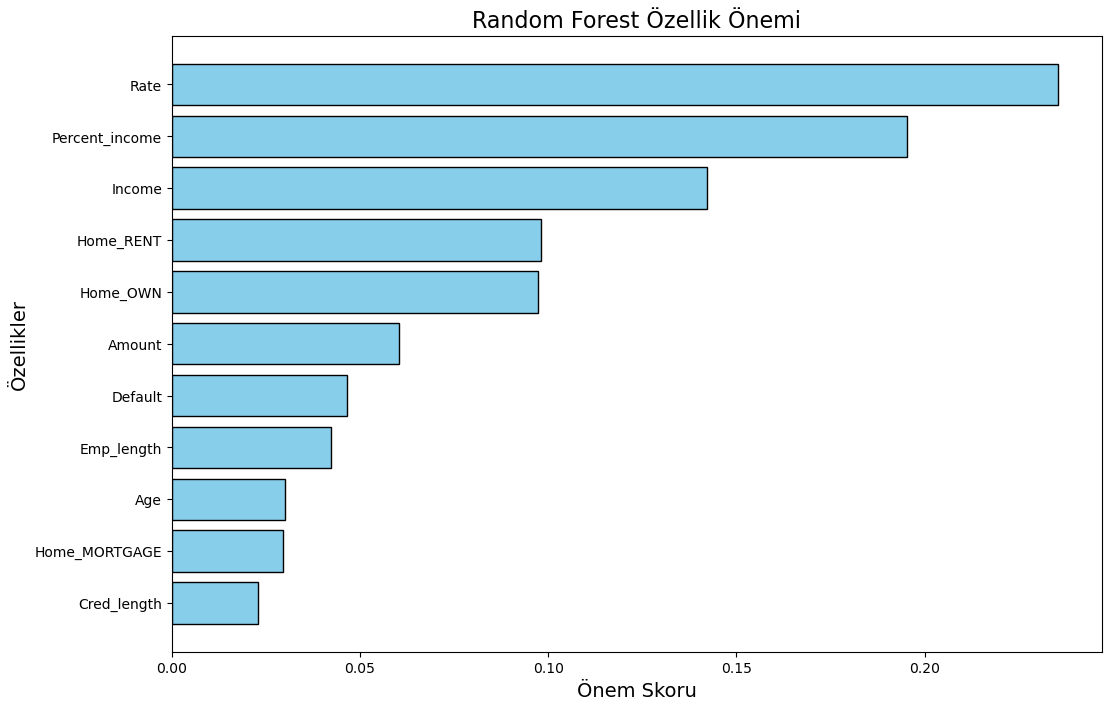

           Feature  Importance
4             Rate    0.235375
5   Percent_income    0.195319
1           Income    0.142106
9        Home_RENT    0.098210
8         Home_OWN    0.097209
3           Amount    0.060368
6          Default    0.046509
2       Emp_length    0.042250
0              Age    0.030094
10   Home_MORTGAGE    0.029609
7      Cred_length    0.022950


In [60]:
# Özelliklerin Önemi
# Random Forest modelinin özellik önem skorlarını alıyoruz
feature_importances = randomforest.feature_importances_

# Modelde kullanılan özelliklerin adlarını alıyoruz
feature_names = a.columns

# Özellikleri Görselleştirme
# Özellik adları ve önem skorlarını bir DataFrame'e dönüştürüyoruz
# Özellikleri önem skorlarına göre azalan sırada sıralıyoruz
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Çubuk Grafiği
# Özellik önemlerini görselleştirmek için bir çubuk grafiği oluşturuyoruz
plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlıyoruz
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue", edgecolor="black")  # Çubuk grafiği
plt.xlabel("Önem Skoru", fontsize=14)  # X ekseni etiketi
plt.ylabel("Özellikler", fontsize=14)  # Y ekseni etiketi
plt.title("Random Forest Özellik Önemi", fontsize=16)  # Başlık
plt.gca().invert_yaxis()  # En önemli özelliği grafiğin üst kısmında göstermek için y eksenini ters çeviriyoruz
plt.show()

# Özellik Önem Skorlarını Yazdırma
# Özelliklerin önem skorlarını ekrana yazdırıyoruz
print(importance_df)


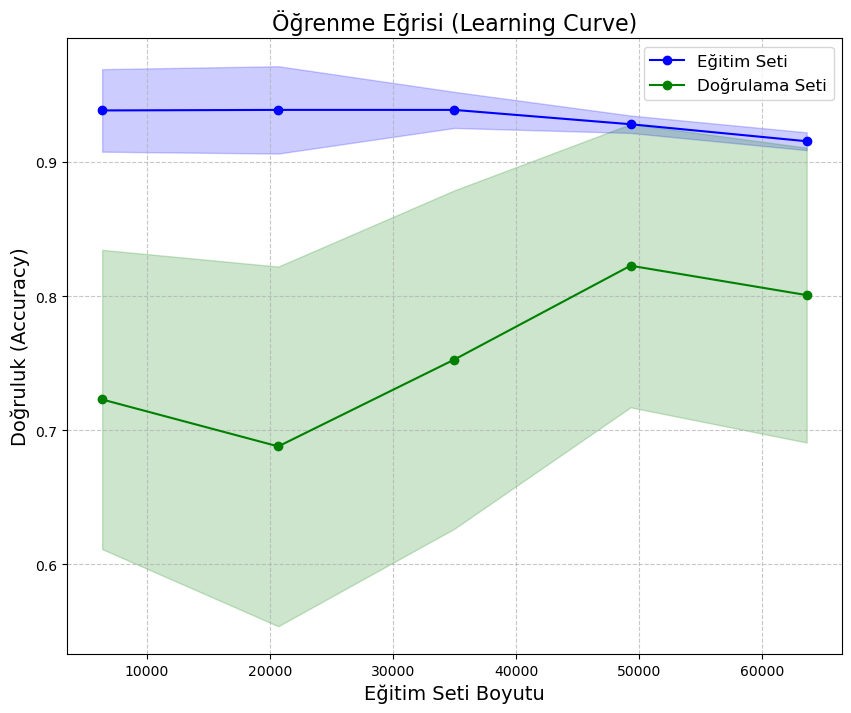

In [61]:
# Modelin öğrenim durumu görselleştirilmiştir.
# Öğrenme eğrisi, modelin eğitim ve doğrulama performansını görselleştirerek modelin davranışını analiz etmemize olanak tanır.
# Az veriyle başlayan model yüksek doğruluk gösterirken, veri arttıkça daha stabil çalışır hale gelir.
# İki grafik arasındaki fark azaldıkça, modelin overfitting gibi olumsuz durumlara karşı dirençli olduğu anlaşılır.

# Öğrenme eğrisi hesaplama
train_sizes, train_scores, test_scores = learning_curve(
    randomforest,          # Kullanılan model (Random Forest)
    a,                     # Özellik seti (bağımsız değişkenler)
    b,                     # Hedef değişken (bağımlı değişken)
    cv=5,                  # 5 katmanlı çapraz doğrulama
    train_sizes=np.linspace(0.1, 1.0, 5),  # Eğitim seti boyutlarının yüzdeleri
    scoring='accuracy'     # Performans değerlendirme metriği (doğruluk)
)

# Eğitim ve doğrulama setleri için ortalama ve standart sapma hesaplama
train_mean = np.mean(train_scores, axis=1)  # Eğitim seti doğruluklarının ortalaması
train_std = np.std(train_scores, axis=1)   # Eğitim seti doğruluklarının standart sapması
test_mean = np.mean(test_scores, axis=1)   # Doğrulama seti doğruluklarının ortalaması
test_std = np.std(test_scores, axis=1)     # Doğrulama seti doğruluklarının standart sapması

# Öğrenme eğrisi çizimi
plt.figure(figsize=(10, 8))  # Grafik boyutunu ayarla
plt.plot(train_sizes, train_mean, 'o-', color='blue', label="Eğitim Seti")  # Eğitim seti doğruluk grafiği
plt.plot(train_sizes, test_mean, 'o-', color='green', label="Doğrulama Seti")  # Doğrulama seti doğruluk grafiği
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')  # Eğitim seti hata alanı
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')  # Doğrulama seti hata alanı

# Grafik etiketleri, başlık ve legend ekleme
plt.title("Öğrenme Eğrisi (Learning Curve)", fontsize=16)  # Grafik başlığı
plt.xlabel("Eğitim Seti Boyutu", fontsize=14)             # X ekseni etiketi
plt.ylabel("Doğruluk (Accuracy)", fontsize=14)            # Y ekseni etiketi
plt.legend(loc="best", fontsize=12)                       # Legend (açıklama) konumu ve boyutu
plt.grid(True, linestyle='--', alpha=0.7)                 # Izgara çizgileri

# Grafiği göster
plt.show()


In [62]:
# 'a' değişkenine, bağımsız değişkenleri (özellikleri) atıyoruz.
# 'Status' hedef değişkenini bağımsız değişkenlerden çıkararak sadece özellikleri bırakıyoruz.
a = df_new.drop("Status", axis=1)  

# 'b' değişkenine, bağımlı değişkeni (hedef değişken) atıyoruz.
b = df_new["Status"]  

# Veri setini eğitim ve test seti olarak ayırıyoruz.
# Test seti veri setinin %30'u olacak şekilde belirleniyor.
# random_state=42 ile sonuçların her seferinde aynı olması sağlanıyor.
a_egitim, a_Test, b_egitim, b_Test = train_test_split(a, b, test_size=0.3, random_state=42)

# Random Forest modelini oluşturuyoruz.
# n_estimators=50: Modelin kullanacağı ağaç sayısını belirler.
# max_depth=50: Ağaçların maksimum derinliğini belirler.
# min_samples_split=50: Bir düğümün dallanması için gereken minimum örnek sayısını belirler.
# random_state=42: Modelin rastgelelik unsurunu kontrol eder.
randomforest = RandomForestClassifier(
    n_estimators=50,
    max_depth=50,
    min_samples_split=50,
    random_state=42
)

# Modeli eğitim seti ile eğitiyoruz.
randomforest.fit(a_egitim, b_egitim)

# Test seti üzerinde tahmin yapıyoruz.
b_pred_test = randomforest.predict(a_Test)

# Eğitim seti üzerinde tahmin yapıyoruz.
b_pred_train = randomforest.predict(a_egitim)


In [63]:
# Eğitim seti performansını yazdırıyoruz.
print("Eğitim Seti Performansı:")
# Eğitim seti için Accuracy (Doğruluk) skoru
print(f"Accuracy: {accuracy_score(b_egitim, b_pred_train):.2f}")
# Eğitim seti için Precision (Kesinlik) skoru
print(f"Precision: {precision_score(b_egitim, b_pred_train):.2f}")
# Eğitim seti için Recall (Duyarlılık) skoru
print(f"Recall: {recall_score(b_egitim, b_pred_train):.2f}")
# Eğitim seti için F1 Skoru
print(f"F1 Score: {f1_score(b_egitim, b_pred_train):.2f}")

# Test seti performansını yazdırıyoruz.
print("\nTest Seti Performansı:")
# Test seti için Accuracy (Doğruluk) skoru
print(f"Accuracy: {accuracy_score(b_Test, b_pred_test):.2f}")
# Test seti için Precision (Kesinlik) skoru
print(f"Precision: {precision_score(b_Test, b_pred_test):.2f}")
# Test seti için Recall (Duyarlılık) skoru
print(f"Recall: {recall_score(b_Test, b_pred_test):.2f}")
# Test seti için F1 Skoru
print(f"F1 Score: {f1_score(b_Test, b_pred_test):.2f}")

# Test seti için Karışıklık Matrisi (Confusion Matrix) yazdırıyoruz.
print("\nConfusion Matrix (Test Seti):")
print(confusion_matrix(b_Test, b_pred_test))


Eğitim Seti Performansı:
Accuracy: 0.96
Precision: 0.98
Recall: 0.94
F1 Score: 0.96

Test Seti Performansı:
Accuracy: 0.95
Precision: 0.96
Recall: 0.93
F1 Score: 0.94

Confusion Matrix (Test Seti):
[[11501   446]
 [  848 11055]]


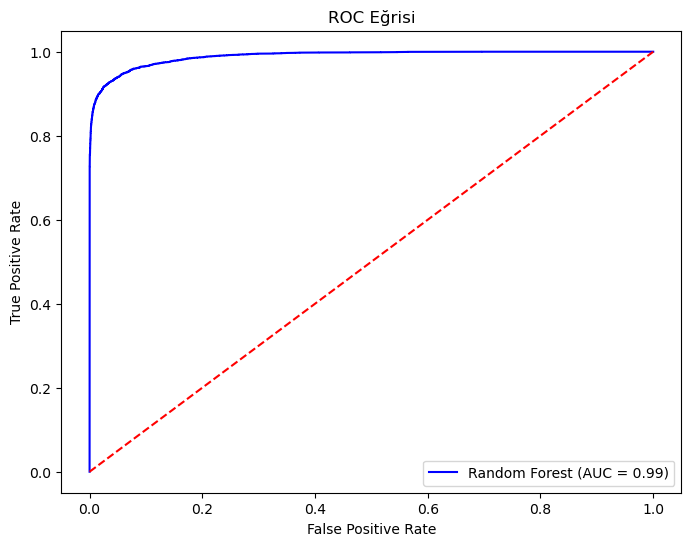

In [64]:
#asagıda bir ROC egrisi ile modelin sınıflandırma performansı acıklanmıstır.
#eger egri y=x dogrusunun ustunde kalıyorsa modelin performansı yuksek olarak kabul edilebilir 
#AUC skoru 0.8 ve 0.9 arasında hesaplanmıs olup çok iyi kategorisine dahildir.
# Model tahmin olasılıkları
b_prob = randomforest.predict_proba(a_Test)[:, 1]  # Pozitif sınıf olasılığı

# ROC eğrisi
fpr, tpr, thresholds = roc_curve(b_Test, b_prob)
auc_score = roc_auc_score(b_Test, b_prob)

# Grafiği çizme
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Rastgele sınıflandırıcı
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi")
plt.legend()
plt.show()




In [65]:
from sklearn.model_selection import cross_val_score  # Çapraz doğrulama fonksiyonu için gerekli modül

# Çapraz doğrulama skorlarını hesaplıyoruz.
# randomforest: Model
# a: Giriş özellikleri (features)
# b: Hedef değişken (target)
# cv=5: 5 katlı çapraz doğrulama
# scoring='accuracy': Değerlendirme metriği olarak doğruluk (accuracy) kullanılıyor.
cv_scores = cross_val_score(randomforest, a, b, cv=5, scoring='accuracy')

# Her bir çapraz doğrulama iterasyonunun doğruluk skorunu yazdırıyoruz.
print("Çapraz Doğrulama Skorları:", cv_scores)

# Çapraz doğrulama skorlarının ortalamasını hesaplayarak genel performansı değerlendiriyoruz.
print("Ortalama Skor:", np.mean(cv_scores))


Çapraz Doğrulama Skorları: [0.76603774 0.67415094 0.94679245 0.95408805 0.9409434 ]
Ortalama Skor: 0.8564025157232706


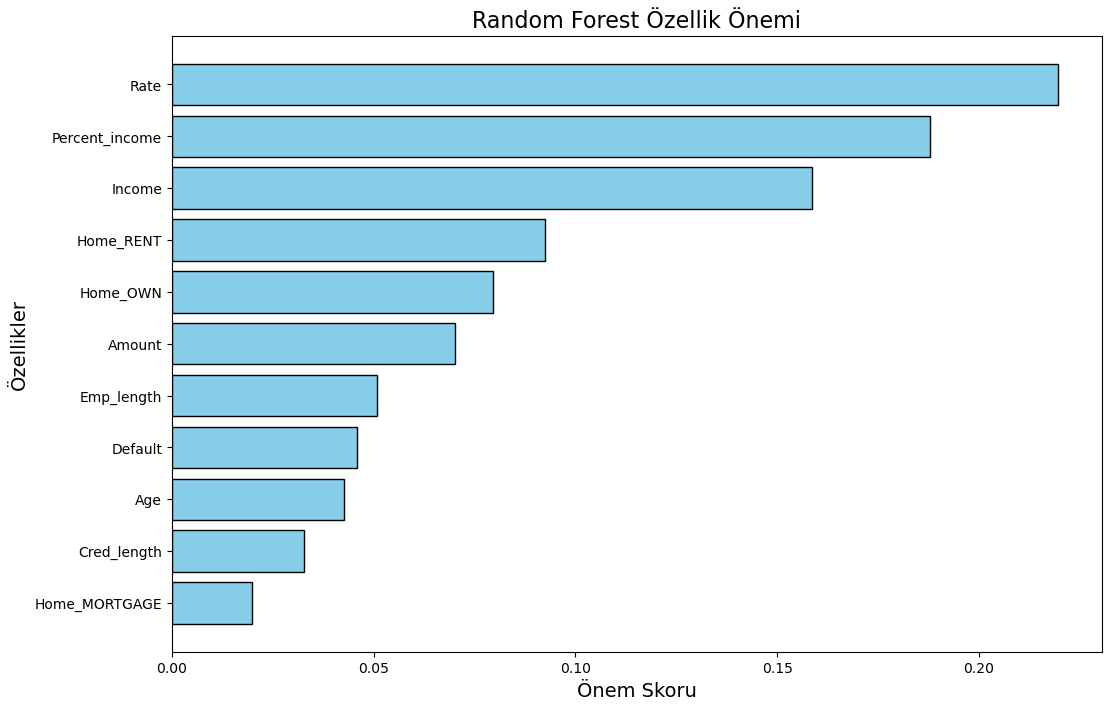

           Feature  Importance
4             Rate    0.219493
5   Percent_income    0.187858
1           Income    0.158558
9        Home_RENT    0.092424
8         Home_OWN    0.079658
3           Amount    0.070139
2       Emp_length    0.050705
6          Default    0.045900
0              Age    0.042698
7      Cred_length    0.032666
10   Home_MORTGAGE    0.019901


In [66]:
# Özelliklerin Önemi
feature_importances = randomforest.feature_importances_  # Model tarafından hesaplanan özellik önem değerleri
feature_names = a.columns  # Özelliklerin adları

# Özellikleri Görselleştirme
importance_df = pd.DataFrame({
    "Feature": feature_names,  # Özellik adlarını DataFrame'e ekleme
    "Importance": feature_importances  # İlgili önem değerlerini ekleme
}).sort_values(by="Importance", ascending=False)  # Öneme göre azalan sırada sıralama

# Çubuk Grafiği
plt.figure(figsize=(12, 8))  # Grafik boyutunu ayarlama
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue", edgecolor="black")  # Çubuk grafiği
plt.xlabel("Önem Skoru", fontsize=14)  # X ekseni etiketini ekleme
plt.ylabel("Özellikler", fontsize=14)  # Y ekseni etiketini ekleme
plt.title("Random Forest Özellik Önemi", fontsize=16)  # Başlık ekleme
plt.gca().invert_yaxis()  # En önemli özelliği üstte göstermek için ters çevirme
plt.show()  # Grafiği gösterme

# Önem Skorlarını Yazdırma
print(importance_df)  # Tabloda özellik ve önem skorlarını yazdırma


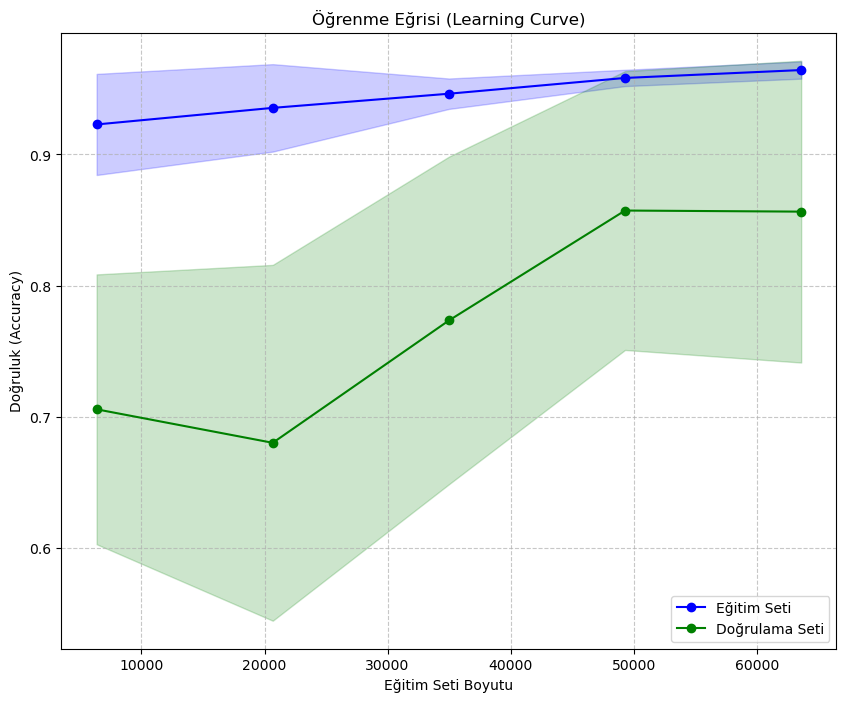

In [67]:
#burada modelin öğrenim durumu görselleştirilmiştir ilk basta yuksek dogruluk ile baslayıp daha sonra bu oran biraz dusup sabitlenmiştir bu modelin
#az veri bulunan verisetlerinde overfitting olma olasılıgını gösterir fakat veri miktarı arttıkca daha stabil calısır hale gelmiştir
#iki grafik arasında kalan alanın git gider azalması modelin guzel performans gosterdiğini ve overfitting gibi olumsuz olayların olmadıgını gösterir
train_sizes, train_scores, test_scores = learning_curve(
    randomforest, a,b, cv=5, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'
)

# Ortalama ve Standart Sapma Hesabı
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Öğrenme Eğrisi Çizimi
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label="Eğitim Seti")
plt.plot(train_sizes, test_mean, 'o-', color='green', label="Doğrulama Seti")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

plt.title("Öğrenme Eğrisi (Learning Curve)")
plt.xlabel("Eğitim Seti Boyutu")
plt.ylabel("Doğruluk (Accuracy)")
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [71]:
# 'Status' sütununu hedef değişken (b) olarak ayırıyoruz
# Geriye kalan tüm sütunlar bağımsız değişkenler (a) olarak alınır
a = df_new.drop("Status", axis=1)  # Hedef değişken hariç tüm veriler
b = df_new["Status"]  # Hedef değişken (Status)

# Veri setini eğitim ve test seti olarak ayırıyoruz
# Test veri seti %30, eğitim veri seti %70 olacak şekilde bölünüyor
a_egitim, a_Test, b_egitim, b_Test = train_test_split(a, b, test_size=0.3, random_state=42)

from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 10, 50],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(a_egitim, b_egitim)
# En iyi hiperparametreleri GridSearchCV'den alıyoruz
best_params = grid_search.best_params_

# En iyi hiperparametrelerle Random Forest modelini yeniden tanımlıyoruz
optimized_rf = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

# Modeli eğitim verileri üzerinde eğitiyoruz
optimized_rf.fit(a_egitim, b_egitim)

# Modelin test veri seti üzerindeki tahminlerini alıyoruz
b_pred_test = optimized_rf.predict(a_Test)

# Modelin eğitim veri seti üzerindeki tahminlerini alıyoruz
b_pred_train = optimized_rf.predict(a_egitim)

# Test ve eğitim seti doğruluk skorlarını hesaplıyoruz
test_accuracy = accuracy_score(b_Test, b_pred_test)
train_accuracy = accuracy_score(b_egitim, b_pred_train)

# Sonuçları yazdırıyoruz
print(f"Eğitim Seti Doğruluğu: {train_accuracy:.4f}")
print(f"Test Seti Doğruluğu: {test_accuracy:.4f}")

# Sınıflandırma raporu ve karmaşıklık matrisi
print("\nSınıflandırma Raporu (Test Seti):")
print(classification_report(b_Test, b_pred_test))

print("\nKarmaşıklık Matrisi (Test Seti):")
print(confusion_matrix(b_Test, b_pred_test))



Eğitim Seti Doğruluğu: 1.0000
Test Seti Doğruluğu: 0.9907

Sınıflandırma Raporu (Test Seti):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11947
           1       0.99      0.99      0.99     11903

    accuracy                           0.99     23850
   macro avg       0.99      0.99      0.99     23850
weighted avg       0.99      0.99      0.99     23850


Karmaşıklık Matrisi (Test Seti):
[[11808   139]
 [   82 11821]]
